In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_csv('heart.csv')

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.duplicated().sum()
df = df.drop_duplicates()


In [6]:
#dividing the features into dependent and independent 
X=df.iloc[:,:-1]##this will take all the columns except last once and these are independent features
y=df.iloc[:,-1]#dependent features

In [7]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [8]:
param_grid = {
    'max_depth': [1,2,3,4,5],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [25,50,100],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}


In [9]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
xgmodel=XGBClassifier()
grid_search = GridSearchCV(estimator=xgmodel,
                           param_grid=param_grid,
                           scoring='accuracy',        # or 'roc_auc' for binary classification
                           cv=5                      # 5-fold cross-validation
                          )                 # use all cores

grid_search.fit(X_train,y_train)
y_pred = grid_search.predict(X_test)


In [10]:
grid_search.best_params_

{'colsample_bytree': 1.0,
 'learning_rate': 0.2,
 'max_depth': 1,
 'n_estimators': 25,
 'subsample': 0.8}

In [11]:
from sklearn.metrics import accuracy_score,classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8571428571428571
              precision    recall  f1-score   support

           0       0.93      0.79      0.85        48
           1       0.80      0.93      0.86        43

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.87      0.86      0.86        91



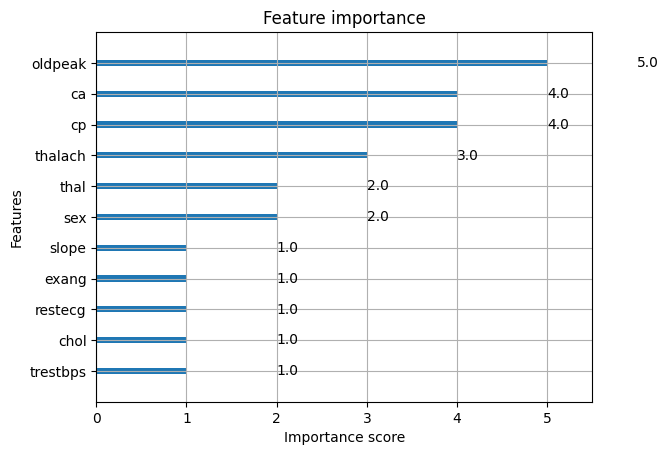

In [14]:
best_model = grid_search.best_estimator_

import xgboost as xgb
xgb.plot_importance(best_model)
plt.show()


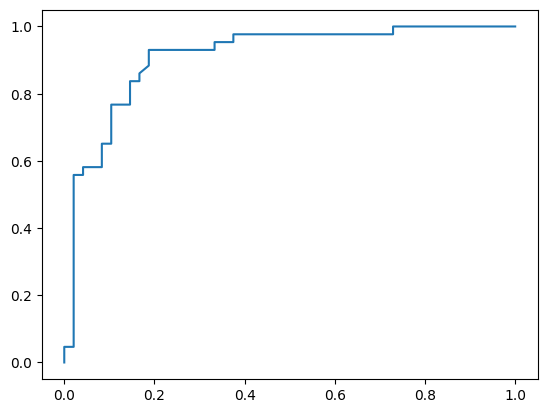

In [17]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, grid_search.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
